### Market Segmentation 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
# calling the dataset
df = pd.read_csv('./Customer_Data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# dimensions of the dataset 
df.shape

(8950, 18)

### Exploration

In [4]:
# null data
100*df.isnull().mean()

# only credit limit and the minimum payments has respcectively 0.01% and 3.49% null values

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [5]:
# unique values
for col in df.columns:
    print(f"{col} : {df[col].nunique()}")

CUST_ID : 8950
BALANCE : 8871
BALANCE_FREQUENCY : 43
PURCHASES : 6203
ONEOFF_PURCHASES : 4014
INSTALLMENTS_PURCHASES : 4452
CASH_ADVANCE : 4323
PURCHASES_FREQUENCY : 47
ONEOFF_PURCHASES_FREQUENCY : 47
PURCHASES_INSTALLMENTS_FREQUENCY : 47
CASH_ADVANCE_FREQUENCY : 54
CASH_ADVANCE_TRX : 65
PURCHASES_TRX : 173
CREDIT_LIMIT : 205
PAYMENTS : 8711
MINIMUM_PAYMENTS : 8636
PRC_FULL_PAYMENT : 47
TENURE : 7


In [6]:
# unique values of tenure
df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

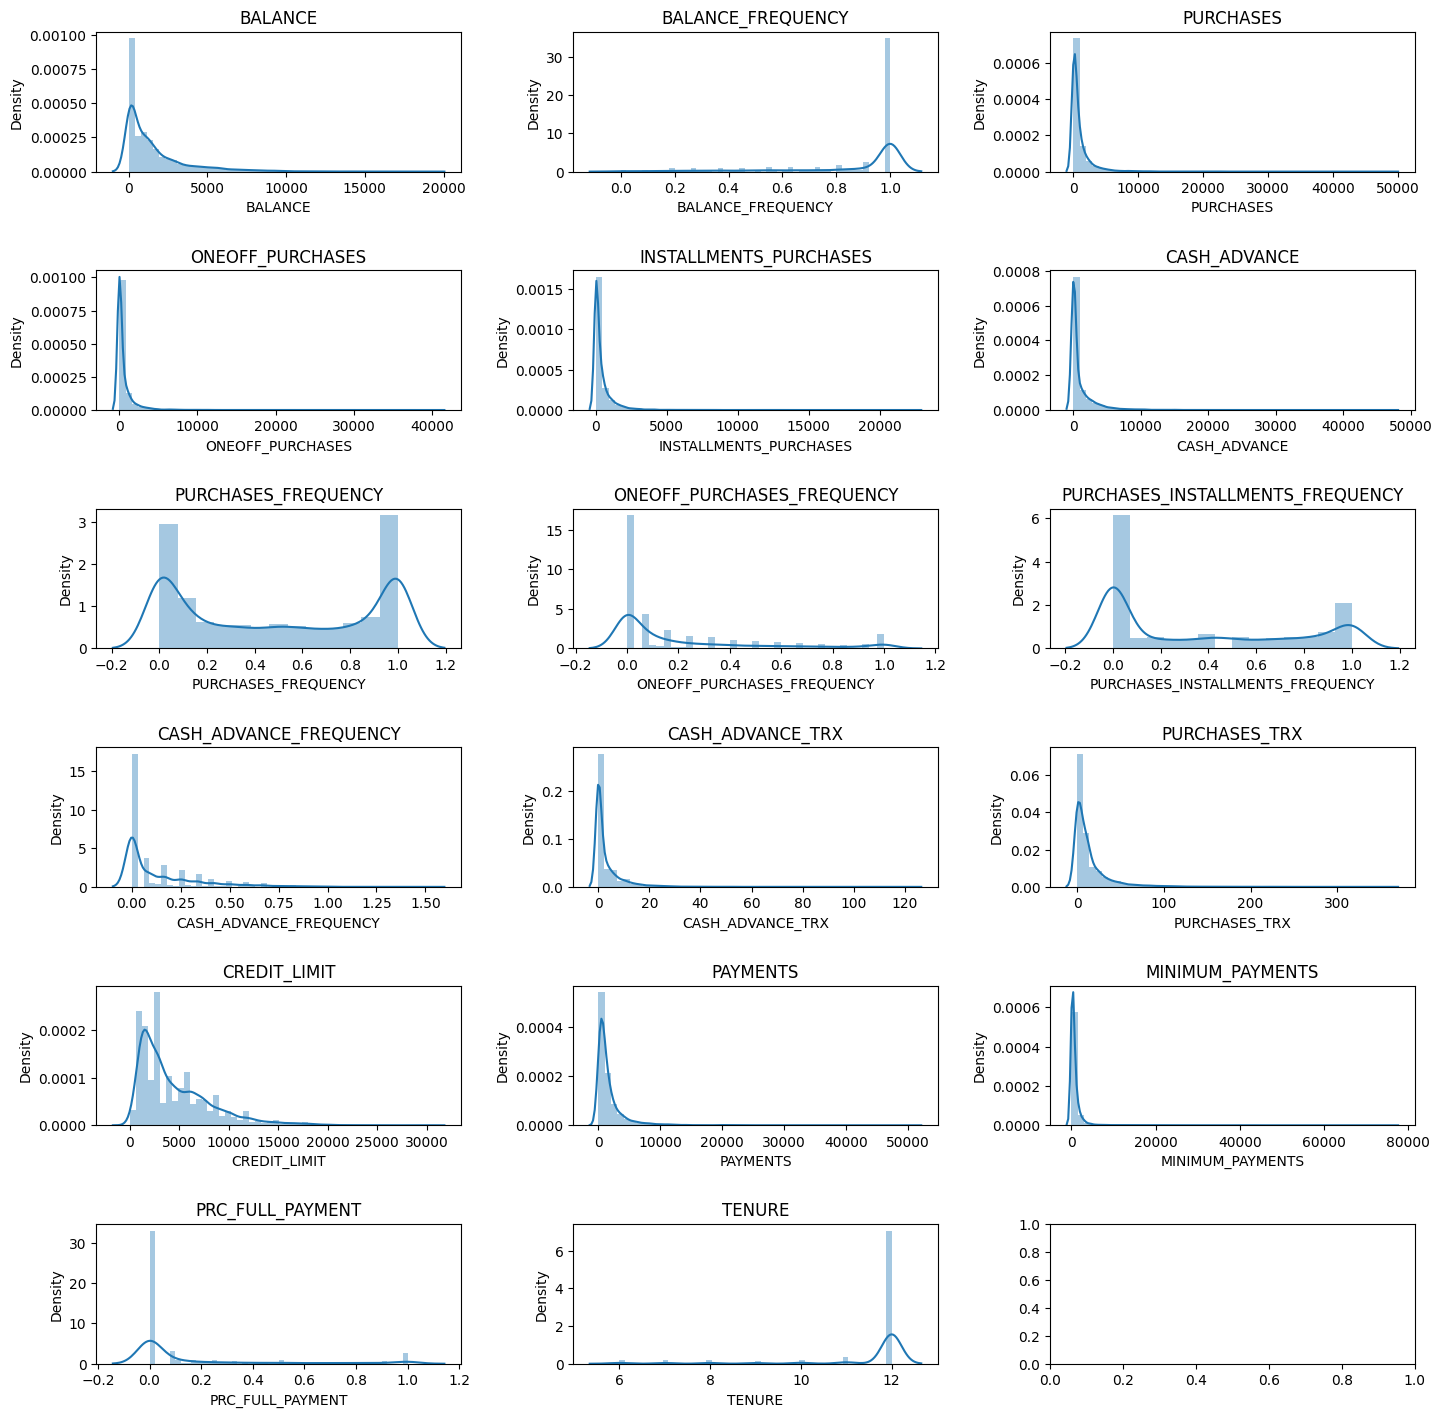

In [7]:
# distribution of the variables
n_cols = 3
n_rows = len(df.columns.drop(['CUST_ID'])) // n_cols + (1 if len(df.columns.drop(['CUST_ID'])) % n_cols else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
fig.tight_layout(pad=5)

for idx, col in enumerate(df.columns.drop(['CUST_ID'])):
    sns.distplot(df[col], ax=axes[idx//n_cols, idx%n_cols])
    axes[idx//n_cols, idx%n_cols].set_title(col)

plt.show()


# most of the variables has a positively skewed distributions except Balance Frequency, Tenure which shows a negatively skewed distribution and the purchase frequency and purchases install frequency has a bimodal pattern

Text(0.5, 1.0, 'Correlation of the variables')

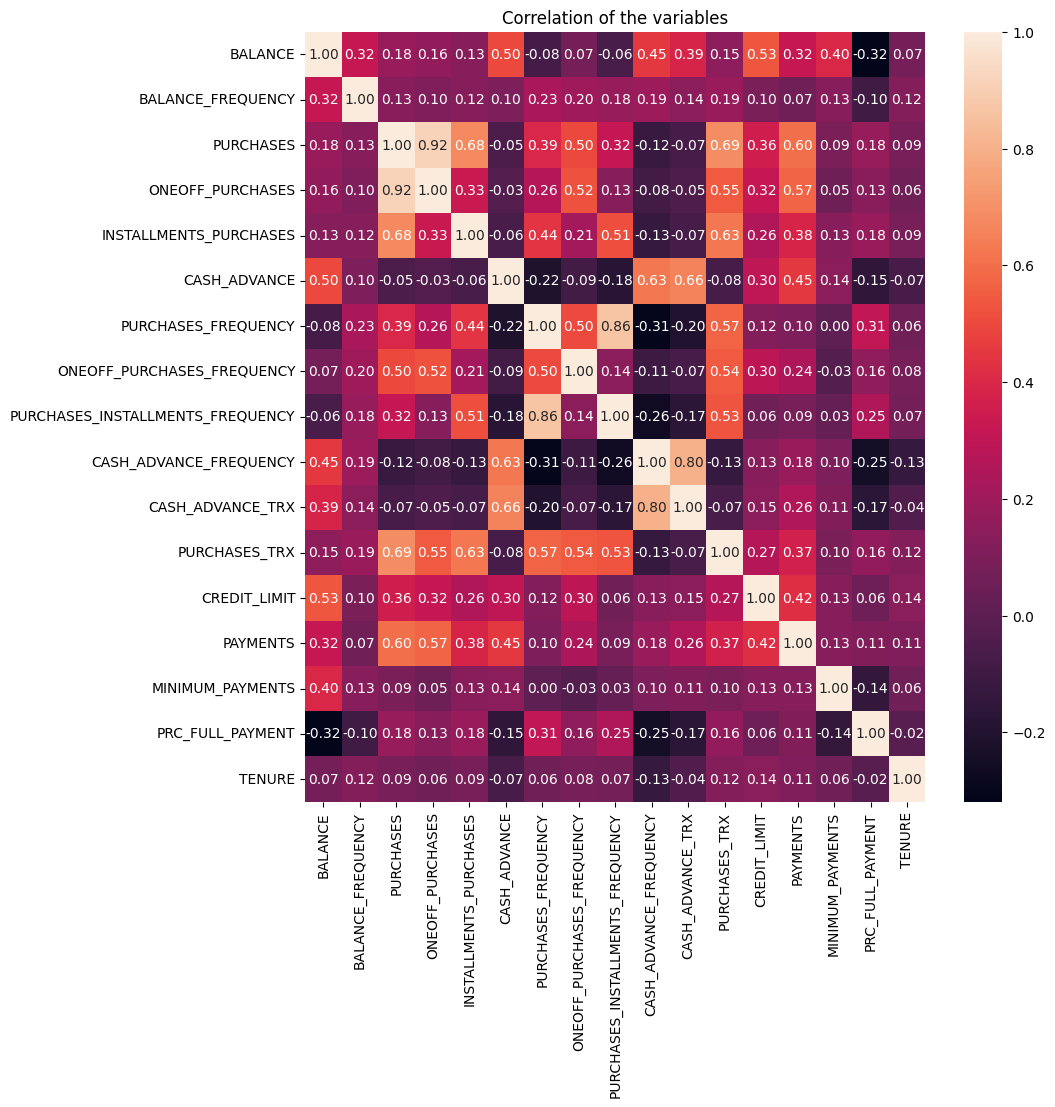

In [8]:
# correlation matrix
corr = df.drop(['CUST_ID'], axis=1).corr()

fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, fmt=".2f", annot=True)
plt.title("Correlation of the variables")

### Data Preprocessing

In [9]:
# removing the cust_id column
df = df.drop(['CUST_ID'], axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
# removing null values
df = df.dropna()
df.shape

(8636, 17)

In [11]:
# features
X = df 
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [12]:
# standard scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=df.columns)
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


### Dimension Reduction

Text(0.5, 1.0, 'Cumulative Explained Variance Ratio for the PCA')

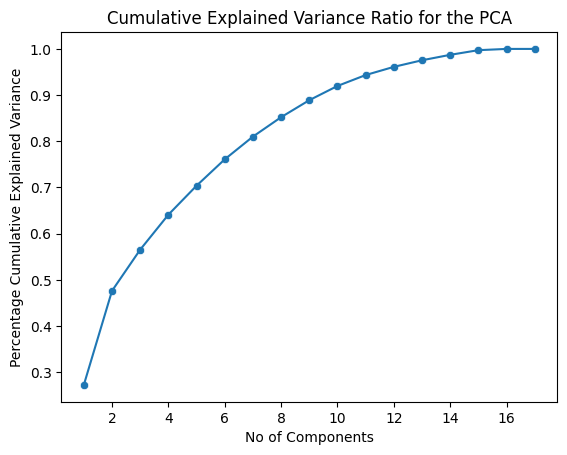

In [13]:
# applying Principal Component Analysis
pca = PCA(n_components=17)
pca.fit(X)

cumulative_exp_var = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot(x=range(1, 18), y=cumulative_exp_var)
sns.scatterplot(x=range(1,18), y=cumulative_exp_var)
plt.xlabel("No of Components")
plt.ylabel("Percentage Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Ratio for the PCA")

# first nine principal components explain the 80% of the total variance

In [14]:
# final Principal Components
pca = PCA(n_components=9)
Z = pca.fit_transform(X)
Z

array([[-1.69639528, -1.12258398,  0.49156157, ...,  0.80899271,
        -0.09397   , -0.01618971],
       [-1.21568083,  2.43563777,  0.69465785, ..., -0.32296908,
        -0.04511853,  0.75461706],
       [ 0.93585329, -0.38520157, -0.02595329, ..., -1.62472141,
         0.07340083, -0.83706589],
       ...,
       [-0.93002625, -1.84123564, -0.35003709, ..., -1.42175665,
        -0.63097551,  0.55822585],
       [-2.35600968, -0.71873015,  1.04852241, ..., -0.9968098 ,
        -0.26308818,  0.9725876 ],
       [-0.59681823, -0.44601943,  1.10524573, ..., -1.55074737,
        -0.28044274, -1.20325461]])

### Clustering Model Building

In [15]:
# applying K-Means Clustering algorithm
n_cluster = range(2, 11)
score = []

for nclus in n_cluster:
    model = KMeans(n_clusters=nclus)
    model.fit(Z)
    score.append(model.inertia_)

Text(0.5, 1.0, 'Plot of Inertia for differene number of clusters')

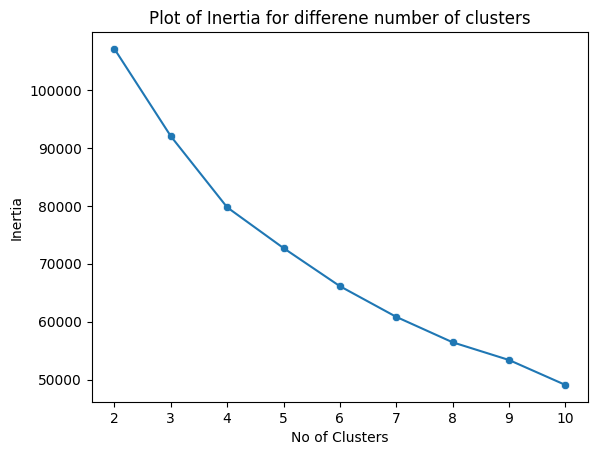

In [16]:
# choosing optimal number of clusters
sns.lineplot(x=n_cluster, y=score)
sns.scatterplot(x=n_cluster, y=score)
plt.xlabel("No of Clusters")
plt.ylabel("Inertia")
plt.title("Plot of Inertia for differene number of clusters")

# at number of cluster = 4 there is an elbow point

### Building the Model

In [59]:
# final kmeans model
model = KMeans(n_clusters=4, random_state=101)
model.fit(Z)

newdf = df.copy()
newdf["clusters"] = model.predict(Z)
newdf.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2


In [60]:
# saving the cluster label of the existing customers
newdf.to_csv('./Customer_Clusters.csv')

### Visualisations of the clustering

Text(0.5, 1.0, 'Clusters in a 2D representation')

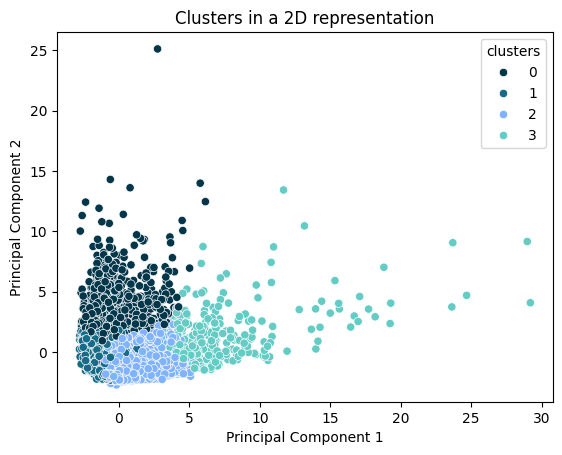

In [50]:
# plotting the first two Principal Component in a scatterplot
PCA_df = pd.DataFrame({
    "PC1": Z[:,0],
    "PC2": Z[:,1],
    "clusters": newdf['clusters'] 
})

sns.scatterplot(x='PC1', y='PC2', data=PCA_df, hue='clusters', palette=["#04364A", "#176B87", "#80B3FF", "#64CCC5"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters in a 2D representation")

### Properties of the cluster

In [51]:
# the cluster centers
clus_cents = pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(model.cluster_centers_)))
clus_cents['clusters'] = range(4)
clus_cents.columns = list(df.columns) + ['clusters']
clus_cents

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,4446.079517,0.976540,413.740563,223.916932,189.813754,4607.819195,0.279738,0.146920,0.183261,0.469162,14.561806,8.267656,7668.559492,3794.577801,2065.397909,0.022919,11.345539,0
1,1076.160241,0.815237,320.183667,291.969852,28.456150,609.542699,0.209613,0.081739,0.105240,0.117610,2.022370,1.444269,3216.696793,1051.038807,566.545892,0.078986,11.479512,1
2,1015.030502,0.952422,1375.075784,625.540007,749.998231,145.407916,0.864684,0.326068,0.706869,0.049582,0.950110,27.275284,4451.472405,1256.883194,648.336868,0.296214,11.632674,2
3,3850.304229,0.985629,9237.942964,6283.397663,2955.374278,1166.739981,1.039180,0.761406,0.827360,0.060784,1.896172,87.765521,10261.347868,9716.574521,2496.707534,0.235198,11.930410,3


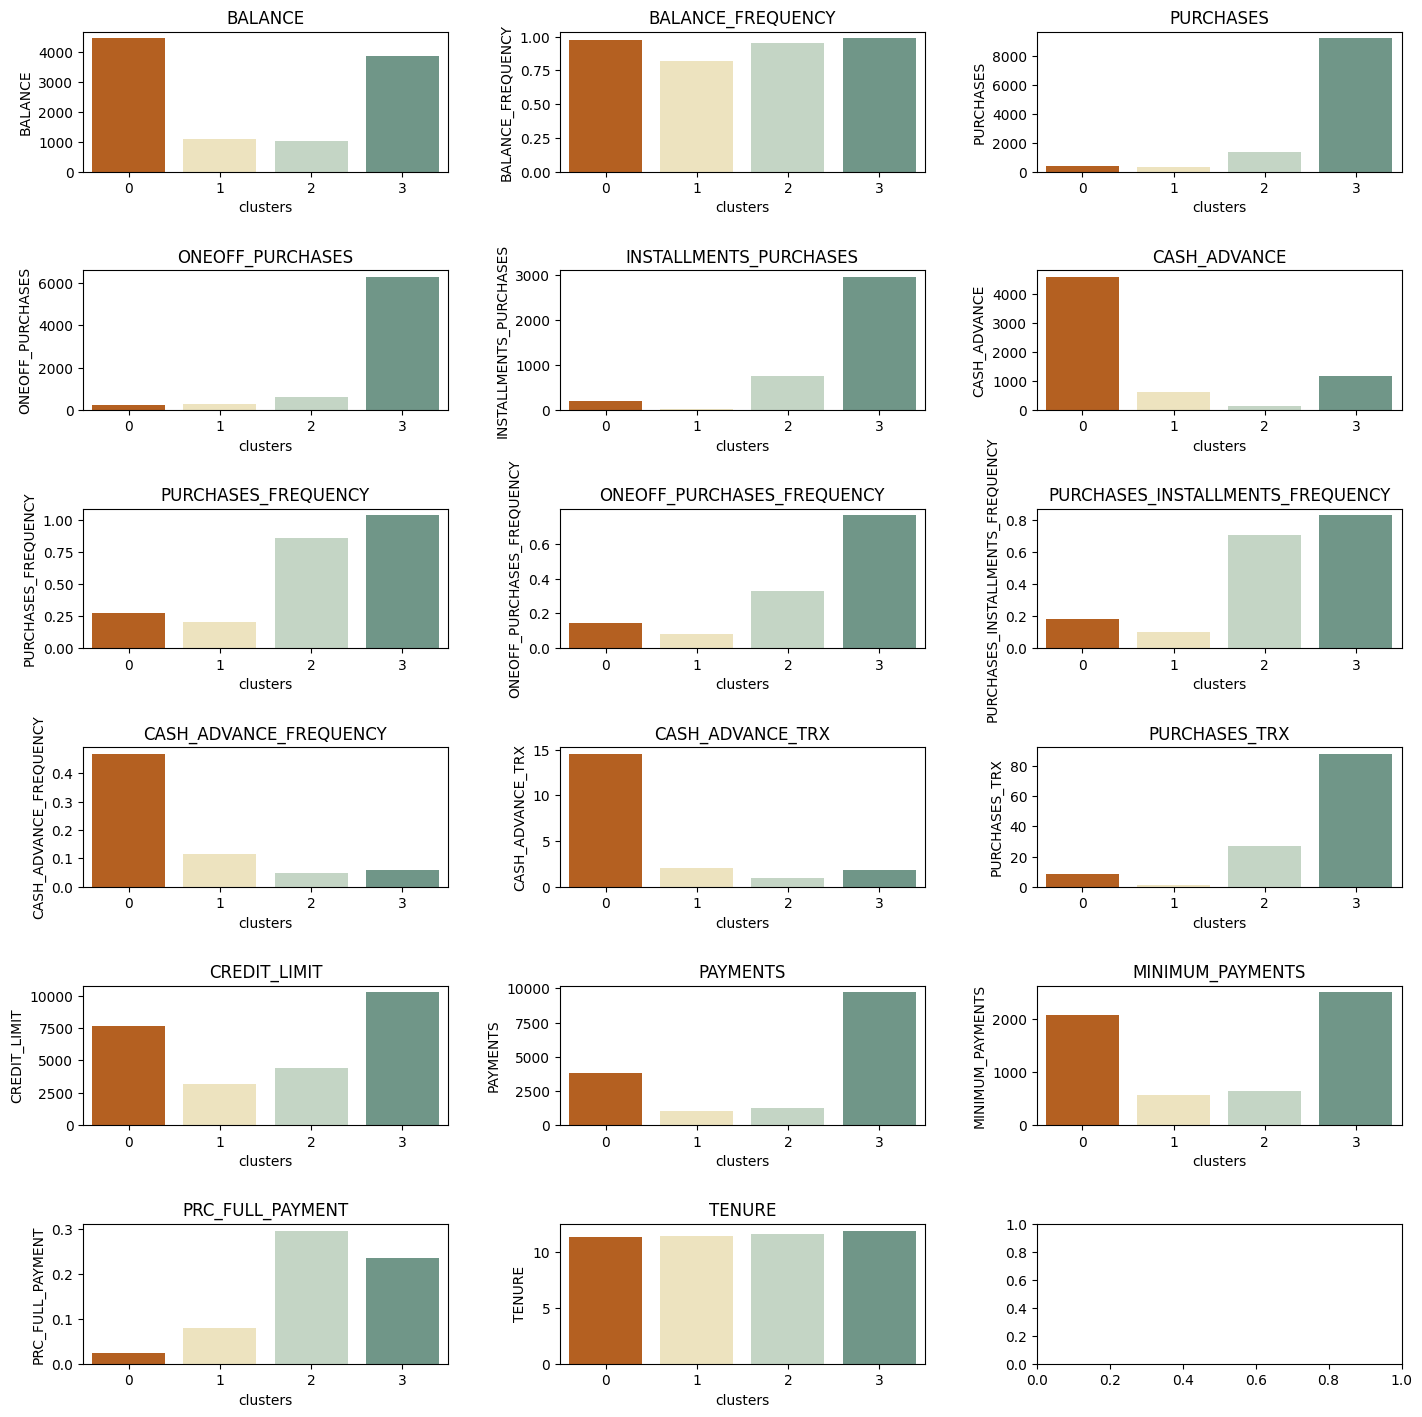

In [54]:
# cluster wise comparison 
n_col = 3
n_columns = len(clus_cents.drop(['clusters'], axis=1).columns)
n_row = n_columns//n_col + (1 if n_columns%n_col else 0) 

fig, ax = plt.subplots(n_row, n_col, figsize=(15,15))
fig.tight_layout(pad=5)

for idx, col in enumerate(clus_cents.drop(['clusters'], axis=1).columns):
    sns.barplot(x='clusters', y=clus_cents[col], data=clus_cents, ax=ax[idx//n_col, idx%n_col], palette=['#CD5C08', '#F5E8B7', '#C1D8C3', '#6A9C89'])
    ax[idx//n_col, idx%n_col].set_title(col)

# Members in cluster 0 and cluster 3 maintains a high balance than the rest of the two clusters
# The values of purchases is highest for the cluster 3
# members of the cluster 0 maintains most of the advanced cash
# members of cluster 2 and 3 frequently purchases products from the organisation 

### Final Model Pipeline

In [55]:
# main model pipeline
model_pipe = Pipeline([
    ('Scaler', StandardScaler()),
    ('Decomposition', PCA(n_components=9)),
    ('Clustering_Algo', KMeans(n_clusters=4, random_state=101))
])

# fitting the pipeline
model_pipe.fit(X)

# predicting the outcome
model_pipe.predict(X)

array([1, 0, 2, ..., 2, 1, 1])

In [58]:
# saving the model in pickle formal
with open('./model.pkl', 'wb') as f:
    pickle.dump(model_pipe, f)